In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# Functions in repo
import read_mta_turnstile

# You can configure the format of the images: ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’.
%config InlineBackend.figure_format = 'png'
# this statement allows the visuals to render within your Jupyter Notebook

%matplotlib inline
mpl.rcParams['figure.dpi']= 300

In [2]:
turnstile_df = read_mta_turnstile.read_mta_turnstile()

Reading: http://web.mta.info/developers/data/nyct/turnstile/turnstile_180505.txt
Reading: http://web.mta.info/developers/data/nyct/turnstile/turnstile_180512.txt
Reading: http://web.mta.info/developers/data/nyct/turnstile/turnstile_180519.txt
Reading: http://web.mta.info/developers/data/nyct/turnstile/turnstile_180526.txt
Reading: http://web.mta.info/developers/data/nyct/turnstile/turnstile_180602.txt


In [3]:
def create_station_heatmap(station_name, turnstile_data):
    ''' Heat map for a station by day of week and by hour
    Two heatmaps. One for Entry count and the other for Exit count
    
    station: station name for the analysis
    turnstile_data: pd.DataFrame of the MTA turnstile data. This will be the clean version that read_mta_stations()

    return (void) plot of the heat map
    '''
    
    # Format dataframe and give it "day of week" and "hour of day" values
    agg = turnstile_data.groupby(['STATION','DATE','TIME'])[['hourly_entries']].sum().reset_index()
    agg.DATE = pd.to_datetime(agg.DATE, format='%m/%d/%Y')
    agg.TIME = pd.to_datetime(agg.TIME, format='%H:%M:%S')
    agg['day_name'] = agg.DATE.dt.dayofweek
    agg['hour_of_day'] = agg.TIME.dt.hour
    
    # group hours into 3 buckets later labeled morning, midday, and evening
    agg.loc[(agg['hour_of_day'] > 7) & (agg['hour_of_day'] <= 11 ), 'hour_of_day'] = 8
    agg.loc[(agg['hour_of_day'] > 11) & (agg['hour_of_day'] < 15 ), 'hour_of_day'] = 12
    agg.loc[(agg['hour_of_day'] >= 15) & (agg['hour_of_day'] < 19 ), 'hour_of_day'] = 16

    #remove hours before 7am and after 7pm
    agg = agg[(agg['hour_of_day'] > 7) & (agg['hour_of_day'] < 19 )]
    
    #format and pivot DataFrame to be Seaborn heatmap "ready"
    hm = agg.loc[agg.STATION == station_name,['hour_of_day','day_name','hourly_entries']]
    hm = hm.groupby(['hour_of_day','day_name'])['hourly_entries'].mean().reset_index()
    hm = hm.pivot(index='hour_of_day',columns='day_name',values='hourly_entries')
    
    
    ########
    # Now repeat code except for the EXITS heatmap
    ########
    
    agg2 = turnstile_data.groupby(['STATION','DATE','TIME'])[['hourly_exits']].sum().reset_index()
    agg2.DATE = pd.to_datetime(agg2.DATE, format='%m/%d/%Y')
    agg2.TIME = pd.to_datetime(agg2.TIME, format='%H:%M:%S')
    agg2['day_name'] = agg2.DATE.dt.dayofweek
    agg2['hour_of_day'] = agg2.TIME.dt.hour
    agg2.loc[(agg2['hour_of_day'] > 7) & (agg2['hour_of_day'] <= 11 ), 'hour_of_day'] = 8
    agg2.loc[(agg2['hour_of_day'] > 11) & (agg2['hour_of_day'] <= 15 ), 'hour_of_day'] = 12
    agg2.loc[(agg2['hour_of_day'] >= 15) & (agg2['hour_of_day'] < 19 ), 'hour_of_day'] = 16
    agg2 = agg2.loc[(agg2['hour_of_day'] > 7) & (agg2['hour_of_day'] < 19 ),:]
    hm2 = agg2.loc[agg2.STATION == station_name,['hour_of_day','day_name','hourly_exits']]
    hm2 = hm2.groupby(['hour_of_day','day_name'])['hourly_exits'].mean().reset_index()
    hm2 = hm2.pivot(index='hour_of_day',columns='day_name',values='hourly_exits')
    
    
    ########
    # Plot
    ########

    xticks = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    yticks = ['Morning', 'Midday', 'Evening']
    
    fig, ax = plt.subplots(1,2, figsize=(12, 4), sharey=True,)
    fig.suptitle(f'{station_name}')
    ax[0].set_title('Entries')
    ax[0].set_xlabel('')
    ax[1].set_title('Exits')
    ax[1].set_xlabel('')
    
    sns.heatmap(hm, cmap='Blues', vmin=0, vmax=50000, xticklabels=xticks, yticklabels=yticks, ax=ax[0])
    sns.heatmap(hm2, cmap='Blues', vmin=0, vmax=50000, xticklabels=xticks, yticklabels=yticks, ax=ax[1])
    
    fig.show()

/home/spencer/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/home/spencer/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/home/spencer/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/home/spencer/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/home/spencer/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using

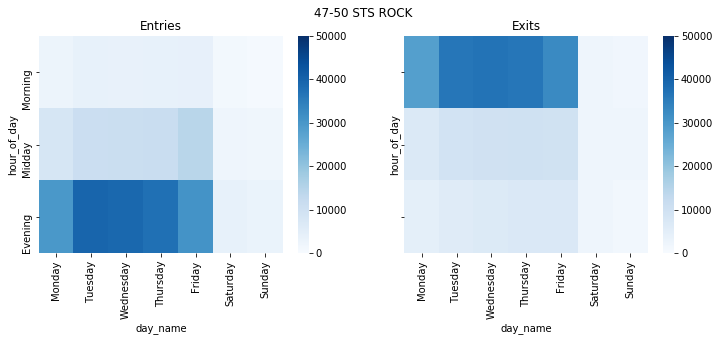

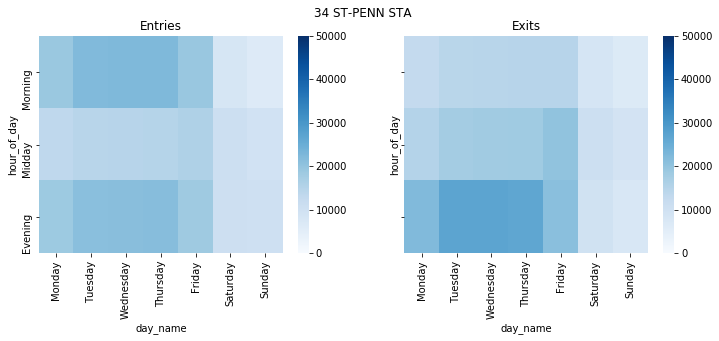

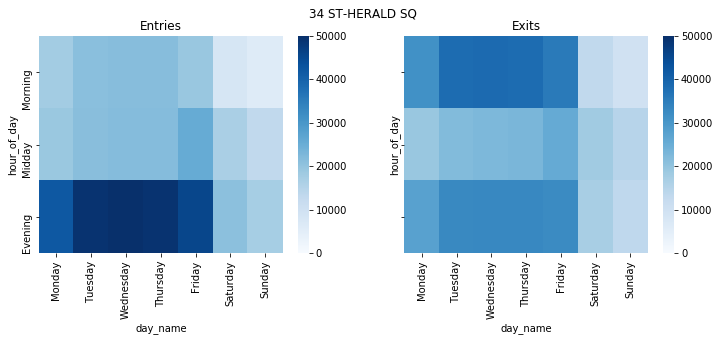

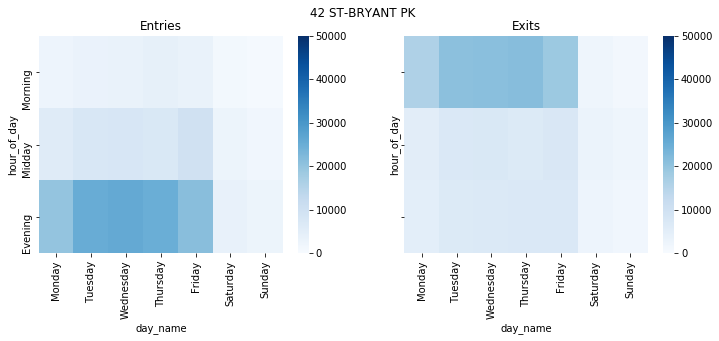

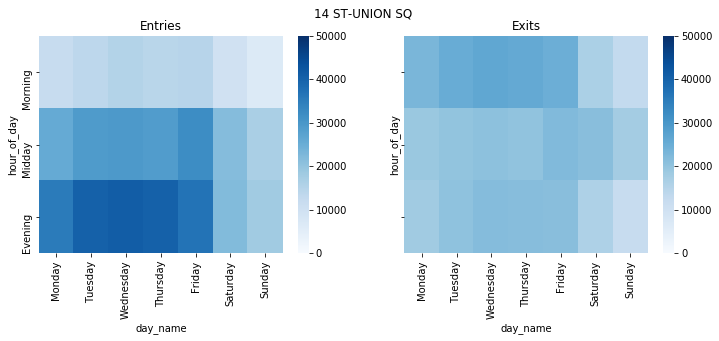

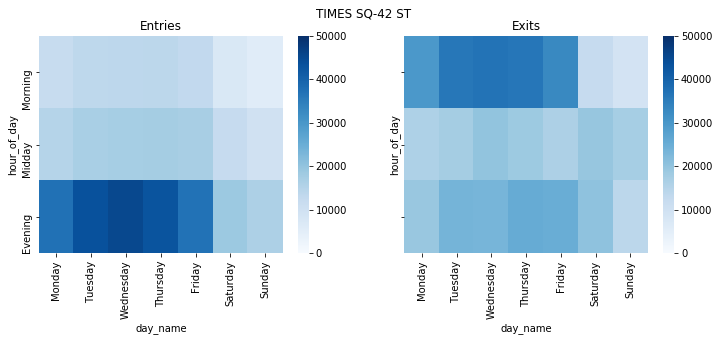

In [4]:
for i in ['47-50 STS ROCK', '34 ST-PENN STA', '34 ST-HERALD SQ',
       '42 ST-BRYANT PK', '14 ST-UNION SQ', 'TIMES SQ-42 ST']:
    create_station_heatmap(i, turnstile_df)